In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold, cross_val_score
from sklearn import linear_model, metrics, grid_search, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
from sklearn.pipeline import Pipeline

%matplotlib inline

In [164]:

# get training & test csv files as a DataFrame
raw_data = pd.read_csv("data/train.csv", dtype={"Age": np.float64}, index_col='PassengerId')

# preview the data
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [165]:
# Drop the data we aren't interested in
raw_data=raw_data.drop(['Embarked','Name','Ticket','Cabin'], axis=1)

In [166]:
# get columns with missed data for train data
total_number_train = raw_data.shape[0]
for column in raw_data.columns.values:
  count = raw_data[column].count()
  if count != total_number_train:
    print(column, total_number_train - count)

Age 177


In [167]:
raw_data["Age"] = raw_data["Age"].fillna(raw_data.mean()["Age"]);

In [168]:
raw_data.loc[raw_data.Sex == 'male', 'Sex'] = 0
raw_data.loc[raw_data.Sex == 'female', 'Sex'] = 1

In [169]:
raw_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,0,22,1,0,7.2500
2,1,1,1,38,1,0,71.2833
3,1,3,1,26,0,0,7.9250
4,1,1,1,35,1,0,53.1000
5,0,3,0,35,0,0,8.0500


In [170]:
# Check if "nulls" exist.
raw_data.isnull().values.any()

False

In [171]:
raw_data.loc[raw_data.Sex == 'male', 'Sex'] = 0
raw_data.loc[raw_data.Sex == 'female', 'Sex'] = 1
raw_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,0,22,1,0,7.2500
2,1,1,1,38,1,0,71.2833
3,1,3,1,26,0,0,7.9250
4,1,1,1,35,1,0,53.1000
5,0,3,0,35,0,0,8.0500


In [172]:
# Random permutation
np.random.seed(0)
raw_data = raw_data.iloc[np.random.permutation(len(raw_data))]
raw_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
496,0,3,0,29.699118,0,0,14.4583
649,0,3,0,29.699118,0,0,7.5500
279,0,3,0,7.000000,4,1,29.1250
32,1,1,1,29.699118,1,0,146.5208
256,1,3,1,29.000000,0,2,15.2458


In [173]:
y = raw_data['Survived']
X = raw_data.drop(['Survived'], axis=1)

In [174]:
clf = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)

In [175]:
train_sizes, train_scores, test_scores = learning_curve.learning_curve(clf, X, y, train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

In [176]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[ 59 178 297 415 534]
[ 0.99435028  0.98689139  0.97194164  0.95983936  0.94818976]
[ 0.77216611  0.80246914  0.83164983  0.8372615   0.83164983]


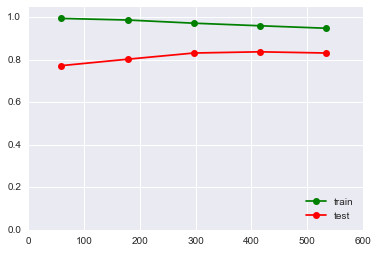

In [177]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')

In [178]:
X_train = X.iloc[:500, :]
X_test = X.iloc[500:, :]
y_train = y.iloc[:500]
y_test = y.iloc[500:]

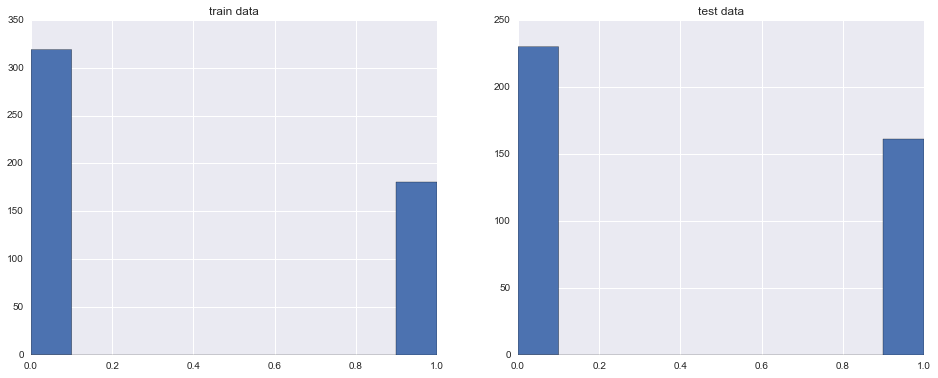

In [179]:
plt.figure(figsize = (16, 6))

plt.subplot(1,2,1)
plt.hist(y_train)
plt.title('train data')

plt.subplot(1,2,2)
plt.hist(y_test)
plt.title('test data')

In [180]:
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=0.2,verbose=False, max_depth=3, random_state=241)
clf.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.2, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=241, subsample=1.0,
              verbose=False, warm_start=False)

In [181]:
predictions = clf.predict(X_test)
metrics.accuracy_score(y_test, predictions)

0.81841432225063937

In [182]:
clf.get_params().keys()

dict_keys(['max_features', 'min_samples_split', 'n_estimators', 'max_depth', 'min_weight_fraction_leaf', 'loss', 'presort', 'max_leaf_nodes', 'min_samples_leaf', 'init', 'learning_rate', 'subsample', 'verbose', 'random_state', 'warm_start'])

In [183]:
parameters_grid = {
    'max_depth' : [3, 5, 10], 
    'learning_rate' : [0.05, 0.1, 0.15, 0.2],
}

In [184]:
grid_cv = grid_search.GridSearchCV(clf, parameters_grid, scoring ='accuracy', cv = 4)

In [185]:
%%time
grid_cv.fit(X_train, y_train)

Wall time: 17.2 s


GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.2, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=241, subsample=1.0,
              verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 10], 'learning_rate': [0.05, 0.1, 0.15, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [186]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.826
{'max_depth': 3, 'learning_rate': 0.05}


### Working with "real test" data

In [187]:
test_data = pd.read_csv("data/test.csv", dtype={"Age": np.float64})

In [188]:
# Drop the data we aren't interested in
test_data=test_data.drop(['Embarked','Name','Ticket','Cabin'], axis=1)

In [189]:
test_data.loc[test_data.Sex == 'male', 'Sex'] = 0
test_data.loc[test_data.Sex == 'female', 'Sex'] = 1
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875


In [190]:
# Check if "nulls" exist.
test_data.isnull().values.any()

True

In [191]:
# get columns with missed data for train data
total_number_train = test_data.shape[0]
for column in test_data.columns.values:
  count = test_data[column].count()
  if count != total_number_train:
    print(column, total_number_train - count)

Age 86
Fare 1


In [192]:
test_data["Age"] = test_data["Age"].fillna(test_data.mean()["Age"]);
test_data["Fare"] = test_data["Fare"].fillna(test_data.mean()["Fare"]);

In [193]:
output = test_data["PassengerId"]
test_data=test_data.drop(['PassengerId',], axis=1)

In [194]:
y_predict = grid_cv.predict(test_data)

In [195]:
test_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [197]:
#output = test_data.PassengerId
output = pd.DataFrame(output)
# len(output)
predict = pd.DataFrame(y_predict)
output = output.join(predict)
output.columns = ['PassengerId', 'Survived']
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [198]:
output.to_csv("results/boosting.csv", index=False)